In [1]:
#step1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Ignore harmless warnings
import  warnings
warnings.filterwarnings("ignore")
#set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#To run sql queries on DataFrame
import pandasql as psql

In [2]:
#step2
# Load the churn data
iris= pd.read_csv(r"C:\Users\R Sobha Supriya\Downloads\Iris (1).csv", header = 0)
#copy the back-up files
iris_ch=iris.copy()
#display bank data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#step3
#dispaly data set information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#sTEP4
#count the target or dependent variable by 0 AND 1 AND THEIR PROPORTION
#(>=10:1, THEN THE DATSET IS IMBALANCE DATA)
Exited_count=iris. Species.value_counts()
print("class0:" ,Exited_count[0])
print("class1:" ,Exited_count[1])
print("prportion:" ,round(Exited_count[0]/Exited_count[1],2),":1")
print("total churn records:" ,len(iris))


class0: 50
class1: 50
prportion: 1.0 :1
total churn records: 150


In [5]:

#step5
#dispalying duplicate values in data set
iris.duplicated().any()
#churndup=churn[churn.duplicated(keep="last")]
#display duplicate records
#churn


False

In [6]:
#step6
#identify missing values  in  the variables
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris['Species']=iris['Species'].map({'Iris-setosa':0,"Iris-versicolor":1,"Iris-virginica":2})

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [10]:
#identify the independent and target variables
indepvar=[]
for col in iris.columns:
    if col!='Species':
        indepvar.append(col)
targetvar='Species'
x=iris[indepvar]
y=iris[targetvar]

In [11]:
# Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Display the shape for train & test data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 5), (45, 5), (105,), (45,))

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

#x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

#x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = mmscaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test)

In [13]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load Iris dataset for example
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
C_Report = classification_report(y_test, y_pred)
print('Classification report:\n', C_Report)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Print Class: 0
TP=50, FN=0, TN=100, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=50, FN=0, TN=100, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=50, FN=0, TN=100, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Negative Rate: 100.0%
Balanced Accuracy: 100.0%
MCC: 1.0


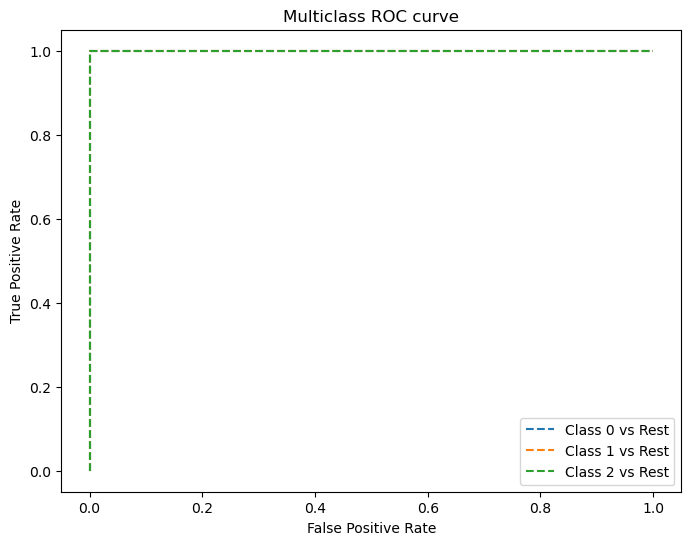

In [14]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Create and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X, y)

# Predict on the entire dataset (for demonstration purposes, you can split it for testing)
y_pred = classifier.predict(X)

# Calculate multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(y, y_pred)

# Define the list of classes
lst_classes = [0, 1, 2]

# Temp store results
model_acc = []
model_recall = []
model_prec = []
model_fscore = []
model_spec = []
model_bal_acc = []
model_mcc = []

for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class]

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)

    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    model_acc.append(accuracy)
    model_prec.append(precision)
    model_recall.append(sensitivity)
    model_fscore.append(f1Score)
    model_spec.append(specificity)
    model_bal_acc.append(balanced_accuracy)
    model_mcc.append(MCC)

    print("Print Class: {0}".format(no_class))
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp))
    print("Accuracy: {0}".format(accuracy))
    print("Precision: {0}".format(precision))
    print("Sensitivity: {0}".format(sensitivity))
    print("F1-Score: {0}".format(f1Score))
    print("Specificity: {0}".format(specificity))
    print("Balanced Accuracy: {0}".format(balanced_accuracy))
    print("MCC: {0}\n".format(MCC))

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()
from statistics import mean

print("Overall Performance Prediction:")
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)))
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)))
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)))
print("F1-Score: {0}".format(round(mean(model_fscore), 4)))
print("Specificity or True Negative Rate: {0}%".format(round(mean(model_spec)*100, 4)))
print("Balanced Accuracy: {0}%".format(round(mean(model_bal_acc)*100, 4)))
print("MCC: {0}".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes

# Generating ROC curves for each class
fpr = {}
tpr = {}
thresh = {}

for i in range(len(lst_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve((y == lst_classes[i]).astype(int), (y_pred == lst_classes[i]).astype(int))

# plotting
plt.figure(figsize=(8, 6))
for i in range(len(lst_classes)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {lst_classes[i]} vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


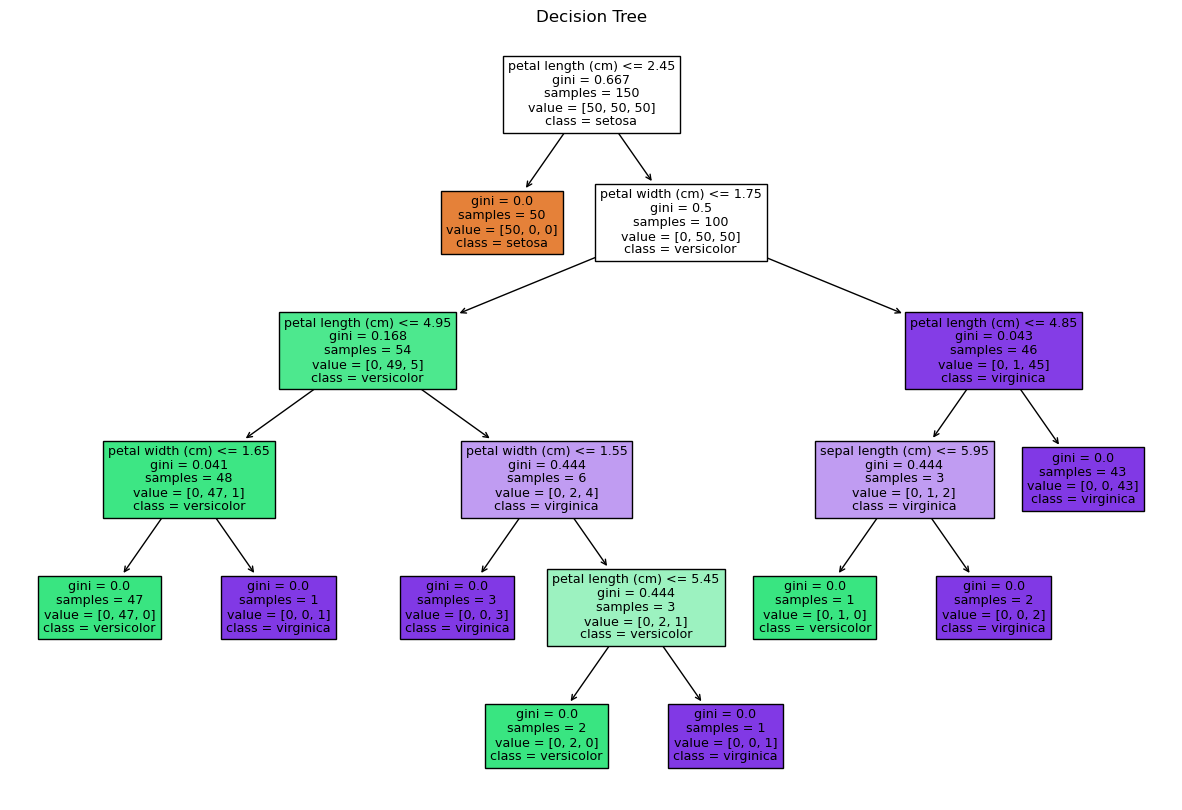

In [15]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Create and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree")
plt.show()
